# Classification Home Credit Indonesia with PyCaret



# 1- Objective


The objective of this notebook will be to tackle the same classification problem from the Kickstarter notebook using the power of PyCaret. We will be exploring more advanced features and capabilities of PyCaret along the way:


-  __Getting Data:__ Learn how to import default datasets from PyCaret repository

-  __Custom Environment Setup:__ Learn how to setup a custom experiment in PyCaret with advanced data transformations!

-  __Compare Models:__ Learn how to compare multiple machine learning models for the given classification task based on model evaluation metrics

-  __Create Model:__ Learn how to create specific classifical models, perform stratified cross validation and evaluate classification metrics

-  __Ensemble Model:__ Learn how to automatically ensemble classification models in different ways

-  __Plot Model:__ Learn how to analyze model performance using various diagnostic plots

-  __Interpret Model:__ Learn how to interpret and explain classification models in different ways using XAI

-  __Finalize Model:__ Learn how to finalize the best model at the end of the experiment

-  __Predict Model:__ Learn how to make predictions on new / unseen data 

# 2 - Install PyCaret

The first step to get started is to install `pycaret`. 

Run all the cells below to install necessary dependencies for some of the advanced capabilities to use with PyCaret along with PyCaret itself

In [6]:
!pip install explainerdashboard
!pip install optuna
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 13.5 MB/s 
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 3.0.3
    Uninstalling Jinja2-3.0.3:
      Successfully uninstalled Jinja2-3.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
!pip install -U jinja2==3.0.3 # https://github.com/pycaret/pycaret/issues/2591 to bypass import errors later on

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Jinja2-3.0.3-py3-none-any.whl (133 kB)
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.0.3 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


## 2.1 - Enable Interactive Visuals

Enable Google Colab to run pycaret

In [5]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


# 3 - Getting the Data From Drive

In [10]:
# import drive to open file from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# import pandas for data manipulation
import pandas as pd

# read train - test  datasets
df_train = pd.read_csv('/content/drive/My Drive/Home Credit Project/data/application_train.csv')
df_test = pd.read_csv('/content/drive/My Drive/Home Credit Project/data/application_test.csv')
print('Size of application_train = ', df_train.shape)
print('Size of application_test = ', df_test.shape)

Size of application_train =  (307511, 122)
Size of application_test =  (48744, 121)


In [ ]:
# show 5 rows and some columns from df_train
df_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

# 4 -  PyCaret Environment Setup

PyCaret's `classification` module (`pycaret.classification`) is a supervised machine learning module which is used for training, tuning, evaluating and deploying classification models. 

setup() initializes the env in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. 

In [12]:
# import all from pycaret classification
from pycaret.classification import *

# our focus target is in 'TARGET' column who had payment difficulties
experiment = setup(data=df_train, target='TARGET', session_id=42) 

Description             Value
0                               session_id                42
1                                   Target            TARGET
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data     (307511, 122)
5                           Missing Values              True
6                         Numeric Features                63
7                     Categorical Features                58
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set     (215257, 306)
12                    Transformed Test Set      (92254, 306)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              8e8f
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

# 5 - Comparing all Models

Comparing all models to evaluate performance is the recommended starting point for modeling once the setup is completed (unless you exactly know what kind of model you need, which is often not the case).

This function trains all models in the model library and scores them using stratified cross validation for metric evaluation. The output prints a score grid that shows average Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC accross the folds (10 by default) along with training times.

In [ ]:
best_model = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.9194  0.7525  0.0164  0.5553   
ada                  Ada Boost Classifier    0.9192  0.7423  0.0210  0.5111   
gbc          Gradient Boosting Classifier    0.9192  0.7500  0.0127  0.5278   
lr                    Logistic Regression    0.9191  0.6233  0.0000  0.0000   
nb                            Naive Bayes    0.9191  0.6128  0.0000  0.0000   
ridge                    Ridge Classifier    0.9191  0.0000  0.0000  0.0000   
rf               Random Forest Classifier    0.9191  0.7066  0.0005  0.3500   
qda       Quadratic Discriminant Analysis    0.9191  0.5000  0.0001  0.0500   
et                 Extra Trees Classifier    0.9191  0.6961  0.0009  0.5500   
dummy                    Dummy Classifier    0.9191  0.5000  0.0000  0.0000   
lda          Linear Discriminant Analysis    0.9187  0.7452  0.0215  0.4442   
knn                K Neighbors Classifier    0.9139  0.5319  0.0126  0.1428   
svm                   SVM - Linear Kernel    0.9133  0.0000  0.0087  0.1523   
dt               Decision Tree Classifier    0.8525  0.5395  0.1660  0.1437   

              F1   Kappa     MCC  TT (Sec)  
lightgbm  0.0318  0.0273  0.0849     9.487  
ada       0.0402  0.0341  0.0907    42.501  
gbc       0.0249  0.0211  0.0723   220.762  
lr        0.0000 -0.0000 -0.0002    30.200  
nb        0.0000  0.0000  0.0000     0.896  
ridge     0.0000 -0.0000 -0.0004     1.096  
rf        0.0010  0.0009  0.0117    97.763  
qda       0.0001  0.0001  0.0011    14.319  
et        0.0017  0.0015  0.0195   116.841  
dummy     0.0000  0.0000  0.0000     0.223  
lda       0.0410  0.0338  0.0834    19.370  
knn       0.0232  0.0101  0.0191    32.523  
svm       0.0111  0.0021  0.0056    60.220  
dt        0.1540  0.0737  0.0739    27.517

`our focus on top 5 best accuracy models`

# 6 - Profiling your Dataset

We can use `pandas_profiling` to generate a nice data profile report of our dataset to get an idea of the major issues in our data which we can perhaps fix in the next section

In [ ]:
import pandas_profiling

In [ ]:
# Select the selected columns to profiling using pandas_profiling
data_train =df_train[[
                      'SK_ID_CURR',
                      'TARGET',
                      'CODE_GENDER',
                      'FLAG_OWN_CAR',
                      'FLAG_OWN_REALTY',
                      'AMT_INCOME_TOTAL',
                      'AMT_CREDIT',
                      'AMT_ANNUITY',
                      'AMT_GOODS_PRICE',
                      'NAME_TYPE_SUITE',
                      'NAME_INCOME_TYPE',
                      'NAME_EDUCATION_TYPE',
                      'NAME_FAMILY_STATUS',
                      'NAME_HOUSING_TYPE',
                      'REGION_POPULATION_RELATIVE',
                      'REGION_RATING_CLIENT_W_CITY',
                      'CNT_CHILDREN',
                      'NAME_CONTRACT_TYPE',
                      ]]

In [ ]:
report = pandas_profiling.ProfileReport(data_train) # choose data_train to profiling
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 7 - Top 5 Models

In [ ]:
# Ada Boost Classifier Model
ada = create_model('ada', fold=3)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.9191  0.7444  0.0210  0.4939  0.0403  0.0339  0.0890
1       0.9192  0.7403  0.0233  0.5153  0.0445  0.0378  0.0964
2       0.9184  0.7422  0.0141  0.3779  0.0272  0.0215  0.0600
Mean    0.9189  0.7423  0.0195  0.4624  0.0374  0.0311  0.0818
Std     0.0004  0.0017  0.0039  0.0604  0.0074  0.0069  0.0157

In [13]:
# Light Gradient Boosting Machine	Model
lgbm  = create_model('lightgbm', fold=3)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.9194  0.7495  0.0169  0.5698  0.0328  0.0283  0.0879
1       0.9193  0.7500  0.0171  0.5470  0.0331  0.0283  0.0860
2       0.9189  0.7511  0.0152  0.4607  0.0294  0.0243  0.0720
Mean    0.9192  0.7502  0.0164  0.5258  0.0317  0.0270  0.0819
Std     0.0002  0.0007  0.0009  0.0470  0.0017  0.0019  0.0071

In [ ]:
# Gradient Boosting Classifier Model
gbc = create_model('gbc', fold=3)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.9193  0.7499  0.0134  0.5342  0.0262  0.0223  0.0751
1       0.9194  0.7477  0.0136  0.5809  0.0266  0.0230  0.0799
2       0.9191  0.7495  0.0145  0.4970  0.0281  0.0237  0.0742
Mean    0.9193  0.7490  0.0138  0.5374  0.0270  0.0230  0.0764
Std     0.0001  0.0009  0.0005  0.0343  0.0008  0.0005  0.0025

In [ ]:
# Logistic Regression	Model
lr = create_model('lr', fold=3)

Accuracy     AUC  Recall  Prec.   F1  Kappa     MCC
Fold                                                     
0       0.9191  0.6244     0.0    0.0  0.0    0.0  0.0000
1       0.9191  0.6204     0.0    0.0  0.0   -0.0 -0.0011
2       0.9191  0.6254     0.0    0.0  0.0    0.0  0.0000
Mean    0.9191  0.6234     0.0    0.0  0.0   -0.0 -0.0004
Std     0.0000  0.0022     0.0    0.0  0.0    0.0  0.0005

In [ ]:
# Naive Bayes	Model
nb = create_model('nb', fold=3)

Accuracy     AUC  Recall  Prec.   F1  Kappa  MCC
Fold                                                  
0       0.9191  0.6143     0.0    0.0  0.0    0.0  0.0
1       0.9191  0.6110     0.0    0.0  0.0    0.0  0.0
2       0.9191  0.6133     0.0    0.0  0.0    0.0  0.0
Mean    0.9191  0.6129     0.0    0.0  0.0    0.0  0.0
Std     0.0000  0.0014     0.0    0.0  0.0    0.0  0.0

# 13 - Plot ML Model Evaluation Diagnostics Using Light Gradient Boosting

Before model finalization, the `plot_model()` function can be used to analyze and evaluate the model performance across different aspects such as AUC, confusion_matrix, decision boundary etc.

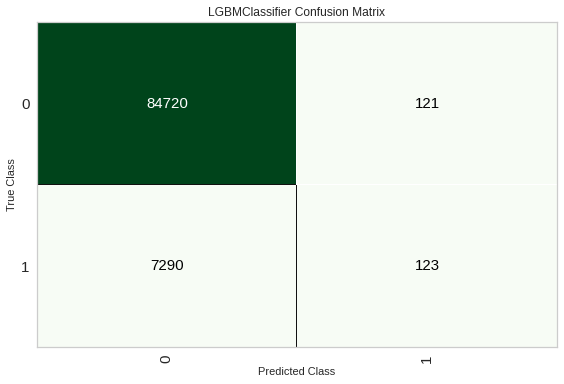

In [14]:
plot_model(lgbm, plot='confusion_matrix')

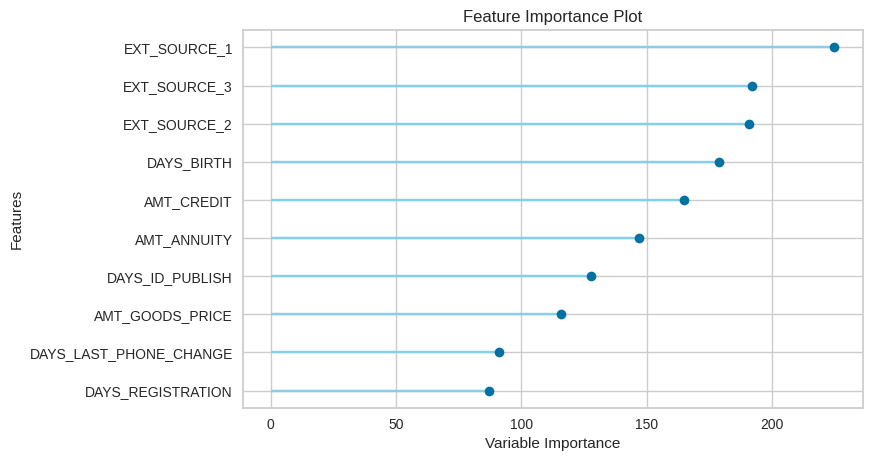

In [ ]:
plot_model(lgbm, plot='feature')

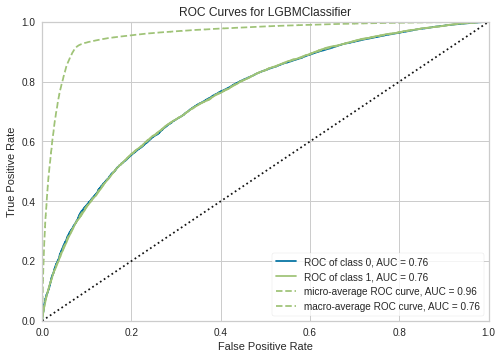

In [ ]:
plot_model(lgbm, plot='auc')

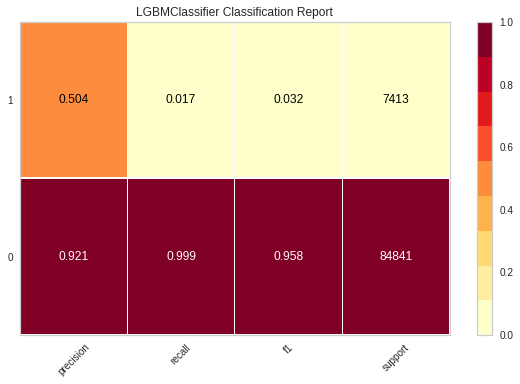

In [ ]:
plot_model(lgbm, plot='class_report')

In [ ]:
evaluate_model(lgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(lgbm, data=df_test.iloc[0:1], verbose=False)

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   

   ... FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0  ...                0                0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  Label   Score  
0                         0.0      0  0.9585  

[1 rows x 123 columns]

In [ ]:
predict_model(lgbm, data=df_test.iloc[5:6], verbose=False)

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
5      100042         Cash loans           F            Y               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
5             0          270000.0    959688.0      34600.5         810000.0   

   ... FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
5  ...                0                0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK  \
5                       0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
5                        0.0                        1.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  Label   Score  
5                         2.0      0  0.9355  

[1 rows x 123 columns]

# 15 - Finalize Model for Deployment

Model finalization is the last step in the experiment. 

A normal machine learning workflow in PyCaret starts with `setup()`, followed by comparing all models using `compare_models()` and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. (more on advanced techniques in the next tutorial!).

This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. 


The `finalize_model()` function fits the model onto the complete dataset **including** the test/hold-out sample (30% in this case). The purpose of this function is to **train the model on the complete dataset** before it is deployed in production.


In [ ]:
#Final Light Gradient Boosting Model to be used for deployment
final_lgbm = finalize_model(lgbm)
final_lgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# 16 - Predict on application test

In [ ]:
new_predictions = predict_model(final_lgbm, data=df_test)

In [ ]:
new_predictions.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0  ...                0                0                        0.0   
1  ...                0                0                        0.0   
2  ...                0                0                        0.0   
3  ...                0                0                        0.0   
4  ...                0                0                        NaN   

  AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       0.0                        0.0   
4                       NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        1.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_YEAR  Label   Score  
0                         0.0      0  0.9680  
1                         3.0      0  0.8538  
2                         4.0      0  0.9740  
3                         3.0      0  0.9645  
4                         NaN      0  0.8348  

[5 rows x 123 columns]